# Хорошо обусловленные матрицы 

Сначала рассмотрим следующий класс матриц:
$A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с диагональным преобладанием.

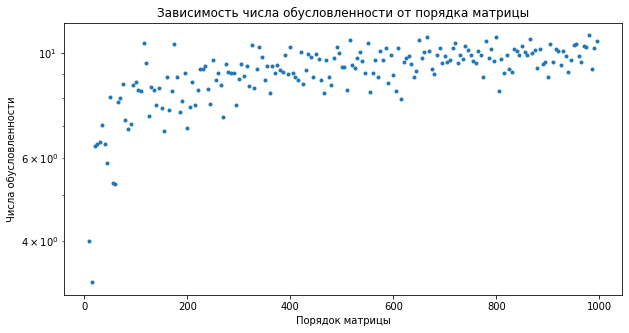

In [3]:
import time
import numpy as np
from numpy import random
import scipy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline
 
demension= np.arange(10, 1000, 5) #порядки матриц используемые в соотвествующих тестах
conds = [] # для запоминания чисел обусловленности
times = [] # для времени работы cond
times1 = []# для времени работы solve
errors = [] # для относительной ошибки решения
discr = [] # для вычисления критерия невязки решения
for n in demension:
    B = np.random.uniform(-50, 50, (n,n))
    L=np.tril(B)
    B = np.random.uniform(-50, 50, (n,n))
    U=np.triu(B)
    for j in range(0,n): # получение диагонального преобладания
        L[j][j]=L[j][j]+n*np.random.uniform(60,200)
    for j in range(0,n): # получение диагонального преобладания
        U[j][j]=U[j][j]+n*np.random.uniform(60,200)
    A=L@U
    start = time.monotonic() #замер времени
    cond=np.linalg.cond(A)  # вычисление числа обусловленности
    t=time.monotonic()-start
    conds.append(cond)
    times.append(t)
    x_prec = random.rand(n)#создание случайного вектора x_prec
    b=A@x_prec #генерация правой части системы линейных уравнений
    start=time.monotonic()
    x_comp=linalg.solve(A,b) # решение системы Ax=b
    t = time.monotonic()-start
    times1.append(t)
    error=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    errors.append(error)
    r=linalg.norm(A.dot(x_comp) - b)/linalg.norm(b) #вычисление критерия невязки решения
    discr.append(r)
    
plt.figure(figsize=(10,5))    
plt.semilogy(demension,conds,'.')
plt.xlabel('Порядок матрицы')
plt.ylabel('Числа обусловленности')
plt.title('Зависимость числа обусловленности от порядка матрицы')
pass

*Числом обусловленности* невырожденной матрицы $A$ называется 
$$
{ cond } А = \| A \|  \cdot \| A^{-1} \|.
$$
Если матрица $A$ вырождена, то полагают ${\rm cond} A = \infty$.
$$
{\rm cond} A =  {\max_{x\ne 0} \frac{\|A x\|}{\|x\|}} \left/ \,{\min_{x\ne 0}\frac{\|A x\|}{\|x\|}} \right..
$$
Таким образом, число обусловленности – это отношение максимального растяжения матрицы к ее минимальному растяжению.
Число обсуловленности можно рассматривать как меру близости матрицы к вырожденной. Чем больше число обусловленности, тем матрица ближе к вырожденной.

Т.к. число обусловленности матрицы это отношение минимального растяжения к минимальному, то можно сделать вывод, что оно напрямую зависит от порядка матрицы и от диапазона элементов матрицы. Т.е. чем больше порядок матрицы и диапазон её элементов, тем вероятнее что число её обусловленности будет выше, однако не всегда.

Можно наблюдать в выше приведённом графике, что на матрицах малого порядка, число обусловленности крайне мало, но с ростом порядка матриц начало расти и число обусловленности. Это можно объяснить тем, что чем больше порядок матриц, тем больше строк, чем больше строк, тем больше вероятность того, что  $  {\max_{x\ne 0} \frac{\|A x\|}{\|x\|}}.$ будет больше и ${\min_{x\ne 0}\frac{\|A x\|}{\|x\|}}.$ , будет меньше. А тогда их отношение будет больше, и по определению число обусловленности будет больше.


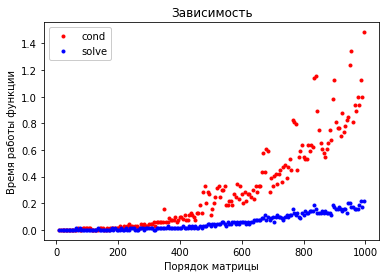

In [4]:
plt.plot(demension, times,'.r', label = 'cond')
plt.plot(demension, times1 , '.b', label ='solve')
plt.legend(loc = 'best', framealpha = 1)
plt.xlabel("Порядок матрицы")
plt.ylabel("Время работы функции")
plt.title("Зависимость")
pass

Такие резльутаты времени работы этих функций вполне очевидны. Так как функция `cond` считает сумму элементов каждой строки и каждый раз сравнивает её с максимальной и минмальной суммой, то примерная сложность работы алгоритма составляет $n^2$. 

Функция `solve` решает с.л.у. методом Гаусса, асимптотика примерно $\frac{n^2}{2}$, что эквивалетно $n^2$, но из-за того, что `scipy.linalg` всегда скомпилирована с поддержкой BLAS/LAPACK, то она может работать быстрее, что и видно на графике.

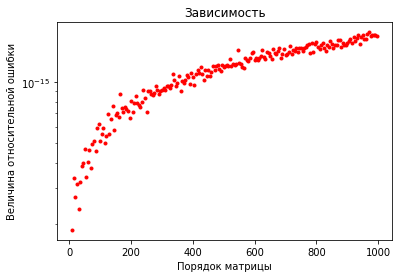

In [5]:
plt.semilogy(demension, errors,'.r')
plt.xlabel("Порядок матрицы")
plt.ylabel("Величина относительной ошибки")
plt.title("Зависимость")
pass

Пусть $x$ – некоторый вектор в ${\bf R}^n$, а $\widetilde{x}$ – другой вектор в ${\bf R}^n$, рассматриваемый как приближение к $x$. Тогда *абсолютной ошибкой* называется число
$$
   \|\Delta x\| = \|\widetilde{x} - x\|,
$$
а *относительной ошибкой* - число
$$
   \frac{\|\Delta x\|}{\|x\|} = \frac{\|\widetilde{x} - x\|}{\|x\|}.
$$
Из графика видно, что чем больше порядок матрицы, тем больше относительная ошибка. Это Объясняется тем, что числа нецелые. Чем больше порядок, тем больше накопление ошибок округления. Следовательно и относительная ошибка будет больше. Так же следует, что чем больше порядок матрицы, тем меньше вероятность, что компьютер решит её верно.

Хотя, как можно заметить, для хорошо обусловленных матриц относительная ошибка сравнительно невелика невелика.

Оказывается, что в методе Гаусса с выбором ведущего элемента по столбцу эквивалентное возмущение примерно равно $C\cdot \varepsilon_{\rm M}$, где $C$ – некоторая константа, обычно не сильно превосходящая $1$.
Таким образом,
$$
\frac{\| \Delta x \|}{\| x \|} \approx C\cdot {\rm cond} A \cdot \varepsilon_{\rm M}.
$$
В нашем случае, при $\varepsilon_{\rm M} \approx 10^{-16}$ и ${\rm cond} A \approx
10^{-1}$ получим относительную ошибку около ${\rm cond} A \cdot \varepsilon_{\rm M}\approx 10^{-15}$, т.е. примерно $15$ правильных значащих цифр.

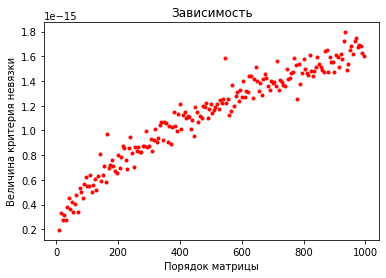

In [6]:
plt.plot(demension, discr,'.r')
plt.xlabel("Порядок матрицы")
plt.ylabel("Величина критерия невязки")
plt.title("Зависимость")
pass

Относительная невязка $\|Ax - b\|/\|b\|$ для случайных с.л.у. $Ax=b$ от числа неизвестных.
Исходя из графиков можно заметить, что при увелчении порядка матрицы растёт и относительная невязка. Она напрямую свзязана с относительной ошибкой. Так как из-за возникновения округления решений, будем меняться и правая часть c.л.у. b. И чем больше было неточных округлений, тем больше будет разница $\|Ax - b\|/\|b\|$.
Число обусловленности растет не очень сильно для данных матриц. Для $n=1000$ оно достигает значения порядка $10^1$. Как следствие, получаем небольшие относительные ошиибки порядка $10^{-16}$. Относительные невязки не првеосходят по порядку величины $10^{-15}$.

 Теперь рассмотрим:  $A=LL^T$, где $L$ – случайные нижняя треугольная матрица с диагональным преобладанием.

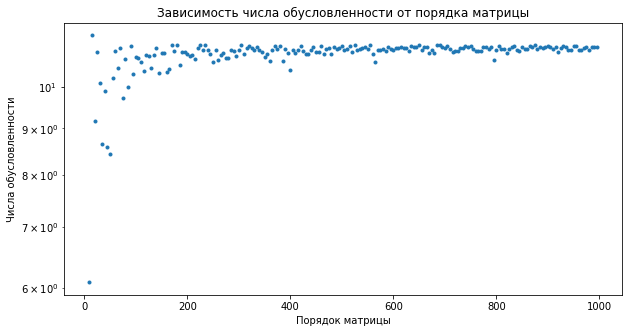

In [7]:
import time
import numpy as np
from numpy import random
import scipy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline
 
demension= np.arange(10, 1000, 5) #порядки матриц используемые в соотвествующих тестах
conds = [] # для запоминания чисел обусловленности
times = [] # для времени работы cond
times1 = []# для времени работы solve
errors = [] # для относительной ошибки решения
discr = [] # для вычисления критерия невязки решения
for n in demension:
    B = np.random.uniform(-50, 50, (n,n))
    L=np.tril(B)
    for j in range(0,n): # получение диагонального преобладания
        L[j][j]=L[j][j]+n*np.random.uniform(60,200)
    A=L@L.T
    start = time.monotonic() #замер времени
    cond=np.linalg.cond(A)  # вычисление числа обусловленности
    t=time.monotonic()-start
    conds.append(cond)
    times.append(t)
    x_prec = random.rand(n)#создание случайного вектора x_prec
    b=A@x_prec #генерация правой части системы линейных уравнений
    start=time.monotonic()
    x_comp=linalg.solve(A,b) # решение системы Ax=b
    t = time.monotonic()-start
    times1.append(t)
    error=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    errors.append(error)
    r=linalg.norm(A.dot(x_comp) - b)/linalg.norm(b) #вычисление критерия невязки решения
    discr.append(r)
    
plt.figure(figsize=(10,5))    
plt.semilogy(demension,conds,'.')
plt.xlabel('Порядок матрицы')
plt.ylabel('Числа обусловленности')
plt.title('Зависимость числа обусловленности от порядка матрицы')
pass

Числа обусловленности класса матриц $A=LL^T$ ничем не отличаются от чисел обусловленности класса матриц $A=LU$, где $L$ и $U$ нижняя треугольная и верхняя треугольная матрицы с диагональным преобладанием.

In [8]:
conds

[6.078851818550577,
 11.410169263032296,
 9.181876528729921,
 10.939943765373789,
 10.108594933014151,
 8.656940074319467,
 9.90009255464345,
 8.576118189452664,
 8.440552018918707,
 10.2324426932773,
 10.970558717326378,
 10.501343228062543,
 11.046018115634192,
 9.718982255009145,
 10.737772873308039,
 10.008351175355934,
 11.106696952728047,
 10.339082768762651,
 10.798889284973745,
 10.782831467921545,
 10.667798199160588,
 10.4278913645103,
 10.842187387501617,
 10.838922003110858,
 10.501331304671757,
 10.840018549254896,
 11.054309780760823,
 10.376641459478956,
 10.897026534425159,
 10.916278432952208,
 10.39190217835534,
 10.479855041575416,
 11.123265614499358,
 10.967581478440225,
 11.138841581048885,
 10.588611147841933,
 10.924806360395625,
 10.931597217782496,
 10.885227928316223,
 10.825313269143715,
 10.855829041800396,
 10.729807386506929,
 11.04259644655741,
 11.130796965810243,
 11.002858813814006,
 11.127665793782926,
 10.984284938211085,
 10.893579867506425,
 10.67

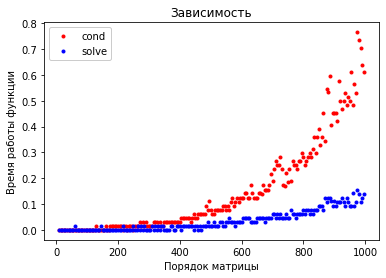

In [12]:
plt.plot(demension, times,'.r', label = 'cond')
plt.plot(demension, times1 , '.b', label ='solve')
plt.legend(loc = 'best', framealpha = 1)
plt.xlabel("Порядок матрицы")
plt.ylabel("Время работы функции")
plt.title("Зависимость")
pass

Функция `solve` в среднем отработала за такое же время, что и для класса матриц $A=LU$. А вот функция `cond` отработала значительно быстрее. Возможно, вычслительная сложность была заметно проще.

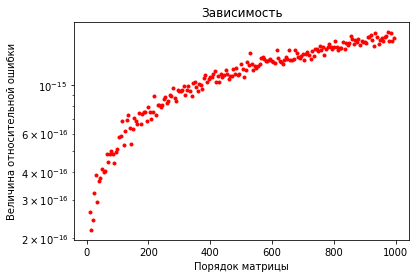

In [10]:
plt.semilogy(demension, errors,'.r')
plt.xlabel("Порядок матрицы")
plt.ylabel("Величина относительной ошибки")
plt.title("Зависимость")
pass

Так как число обусловленности такое же, как и для $A=LU$, примерно $10^1$, то и величина относительной ошибки такая же, не превосходит $10^{-15}$

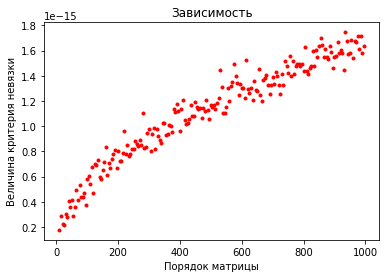

In [13]:
plt.plot(demension, discr,'.r')
plt.xlabel("Порядок матрицы")
plt.ylabel("Величина критерия невязки")
plt.title("Зависимость")
pass

Относительные невязки не првеосходят по порядку величины $10^{-15}$.

# Плохо обусловленые матрицы

Рассмотрим: $A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с малыми диагональными элементами.


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=3.01703e-19): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.24577e-19): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=5.90557e-18): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.75271e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.62721e-19): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=2.14107e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: Li

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=3.58068e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.3585e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=8.50854e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.38825e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=4.69954e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.26536e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: Lin

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.36642e-20): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=2.10248e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=9.48153e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=4.64174e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=3.44664e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=3.00108e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: Li

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.39772e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=2.24426e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=8.16851e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=1.09258e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=3.94125e-22): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: LinAlgWarning: Ill-conditioned matrix (rcond=2.00847e-21): result may not be accurate.
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: Li

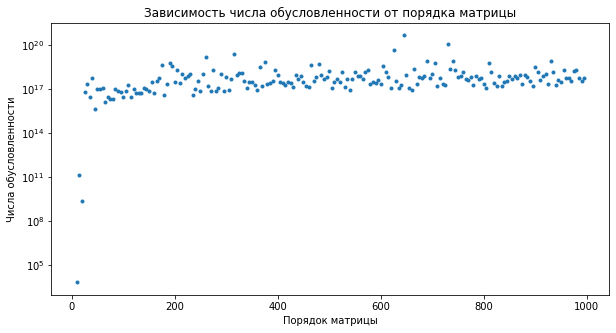

In [15]:
import time
import numpy as np
from numpy import random
import scipy.linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline
 
demension= np.arange(10, 1000, 5) #порядки матриц используемые в соотвествующих тестах
conds = [] # для запоминания чисел обусловленности
times = [] # для времени работы cond
times1 = []# для времени работы solve
errors = [] # для относительной ошибки решения
discr = [] # для вычисления критерия невязки решения
for n in demension:
    B = np.random.uniform(-50, 50, (n,n))
    L=np.tril(B)
    B = np.random.uniform(-50, 50, (n,n))
    U=np.triu(B)
    A=L@U
    start = time.monotonic() #замер времени
    cond=np.linalg.cond(A)  # вычисление числа обусловленности
    t=time.monotonic()-start
    conds.append(cond)
    times.append(t)
    x_prec = random.rand(n)#создание случайного вектора x_prec
    b=A@x_prec #генерация правой части системы линейных уравнений
    start=time.monotonic()
    x_comp=linalg.solve(A,b) # решение системы Ax=b
    t = time.monotonic()-start
    times1.append(t)
    error=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    errors.append(error)
    r=linalg.norm(A.dot(x_comp) - b)/linalg.norm(b) #вычисление критерия невязки решения
    discr.append(r)
    
plt.figure(figsize=(10,5))    
plt.semilogy(demension,conds,'.')
plt.xlabel('Порядок матрицы')
plt.ylabel('Числа обусловленности')
plt.title('Зависимость числа обусловленности от порядка матрицы')
pass

Как можно убедиться на этом примере, числа обусловленности практически не зависят от порядка матриц, они, скорее всего, зависят от диапазона значений элементов матрицы. Следующий пример:

In [16]:
C=np.array([[10e13,10e16],[4,1]])
np.linalg.cond(C)

2.500627656914229e+16

Как мы видим матрица второго порядка, но число обусловленности довольно большое

In [58]:
conds

array([4.33700545e+17, 6.35842321e+17, 4.30585982e+16, 4.66310456e+16,
       7.89296511e+16, 8.87697902e+17, 7.28500135e+17, 4.34408762e+17,
       5.08120520e+17, 1.00612148e+18])

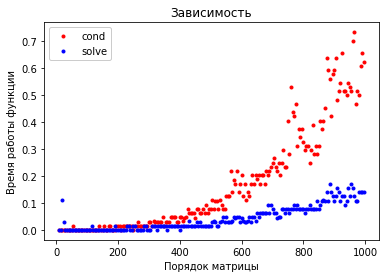

In [17]:
plt.plot(demension, times,'.r', label = 'cond')
plt.plot(demension, times1 , '.b', label ='solve')
plt.legend(loc = 'best', framealpha = 1)
plt.xlabel("Порядок матрицы")
plt.ylabel("Время работы функции")
plt.title("Зависимость")
pass

Как мы видим функция `cond` отработала за такое же время, что и для класса $A=LL^T$. Вполне логично что время работы функция `cond` не зависит от велечины числа обусловленности. Хотя довольно странно, что для матриц класса $A=LU$, где $L$ и $U$ нижняя треугольная и верхняя треугольная матрицы с диагональным преобладанием, функция `cond` отработала дольше, чем в остальных экспериментах, но это может быть связано даже с компьютером, который мог быть нагружен какими-либо щё процессами в тот момент, или опять же, из-за вычислительной сложности.

Время работы функции `solve` cтабильно.

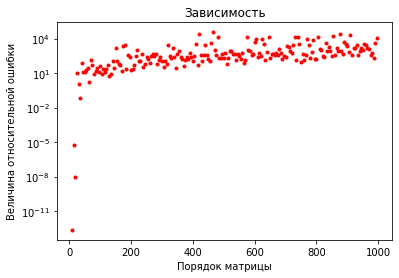

In [20]:
plt.semilogy(demension, errors,'.r')
plt.xlabel("Порядок матрицы")
plt.ylabel("Величина относительной ошибки")
plt.title("Зависимость")
pass

Величина относительной ошибки очень большая, следовательно, для плохо обусловленных матриц в арфиметике с палавающей запятой решение не может быть найдено с хорошей точностью ни одним алгоритмом.

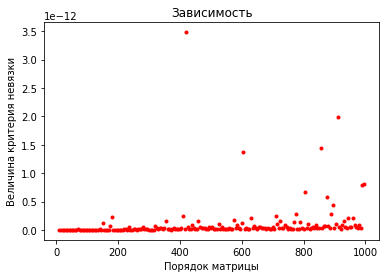

In [21]:
plt.plot(demension, discr,'.r')
plt.xlabel("Порядок матрицы")
plt.ylabel("Величина критерия невязки")
plt.title("Зависимость")
pass

Величина относительной ошибки порядка $10^{-12}$.